In [1]:
# Importing libraries 
import pandas as pd    # For anallysis and wrangling 
import numpy as np

import matplotlib.pyplot as plt     # For Visualization
import seaborn as sns

In [88]:
# Reading the datasets train,test,test_result 
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
output_df=pd.read_csv("gender_submission.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [90]:
test_df['Survived']=output_df['Survived'] #we have added Survived column(target) to test so that we can train the test data also

In [91]:
test_df[0:3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [92]:
df=pd.concat([train_df,test_df])  #concatenating the test data to train data to form large data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
df.describe()  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [94]:
df.describe(include='O')    #statistics for object data type 

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [95]:
df.info() # getting some info about dataset which we form 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [96]:
df.shape  # Rows and Columns of dataset 

(1309, 12)

In [97]:
df.columns  # Column names 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [98]:
df.isnull().sum()    # checking for null values if any 

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [99]:
# since cabin has large no. of null values and ,Ticket is not of much use
# sok we can drop it safely
df.drop(columns=['Cabin','Ticket'],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [100]:
# also we can drop all the na values in the data set , since dataset is large and na values is less 
df.dropna(inplace=True)

In [101]:
df.shape   # After dropping the shape is,

(1043, 10)

0    628
1    415
Name: Survived, dtype: int64


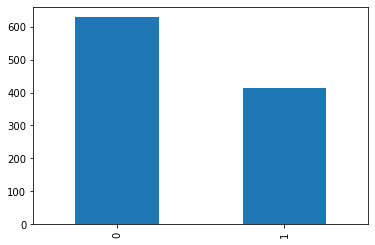

In [102]:
print(df.Survived.value_counts())
df.Survived.value_counts().plot(kind='bar') # 1- survived ,0- died
plt.show()

`since 0(died) has 628 entries and 1(survived) has 415 entries , so we can consider it as balanced dataset 
 because there is not much difference`

   Pclass  Survived
0       1  0.595745
1       2  0.429119
2       3  0.270000


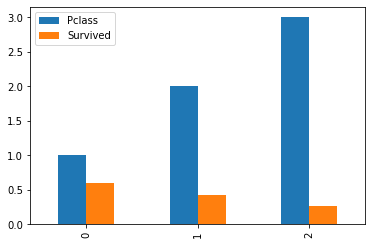

In [103]:
print(df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False))
df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False).plot(kind='bar')
plt.show()

      Sex  Survived
0  female  0.834197
1    male  0.141553


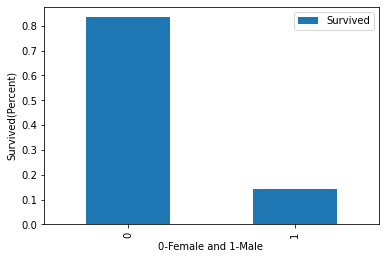

In [104]:
print(df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False))
df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False).plot(kind="bar")
plt.ylabel("Survived(Percent)")
plt.xlabel("0-Female and 1-Male ")
plt.show()

In [105]:
df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.547170
1,Q,0.400000
2,S,0.357234


   SibSp  Survived
6      8  0.000000
5      5  0.166667
4      4  0.181818
3      3  0.312500
2      2  0.444444
1      1  0.525000
0      0  0.354839


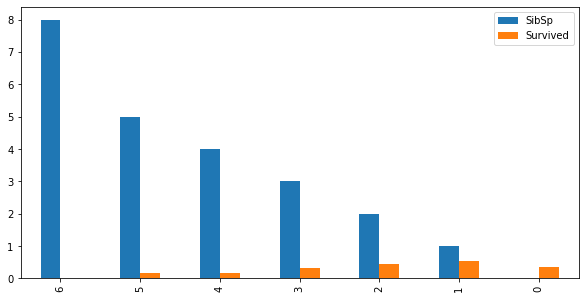

In [106]:
print(df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='SibSp',ascending=False))
df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='SibSp',ascending=False).plot(kind='bar',figsize=(10,5))
plt.show()

   Parch  Survived
3      3  0.625000
2      2  0.577320
1      1  0.556250
0      0  0.343791
4      4  0.200000
5      5  0.166667
6      6  0.000000


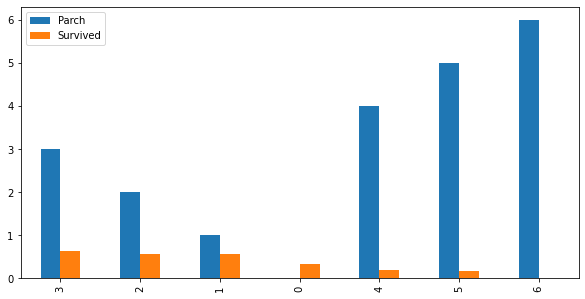

In [107]:
print(df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False))
df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False).plot(kind='bar',figsize=(10,5))
plt.show()

In [108]:
# we can extract Title from the name and make a new column as Title 
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [109]:
pd.crosstab(df['Title'],df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2


`There are many titles which have only 1-2 people under it, so we can group that titles into rare`

In [110]:
df['Title']=df['Title'].replace(['Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Rev','Sir','Major','Lady'],'Rare')
df['Title']=df['Title'].replace('Mlle','Miss')
df['Title']=df['Title'].replace('Mme','Mrs')
df['Title']=df['Title'].replace('Ms','Miss')


In [111]:
df[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.864706
1,Miss,0.806604
0,Master,0.396226
4,Rare,0.321429
2,Mr,0.115517


In [112]:
df['Title'].isnull().sum()

0

In [113]:
# mapping the data into int dtype 
# {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
map_title={"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title']=df['Title'].map(map_title)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [114]:
# Now we can safely drop name column and also Passebger id since its of no use 
df.drop(columns=['Name','PassengerId'],inplace=True)

In [115]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [116]:
# Mapping the sex Column as in datatype
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [117]:
df['Age']=df['Age'].astype(int) # age to int dtpye

In [118]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
409,1,3,1,3,1,1,13.7750,S,2
411,1,1,1,37,1,0,90.0000,Q,3
412,1,3,1,28,0,0,7.7750,S,2
414,1,1,1,39,0,0,108.9000,C,5


In [119]:
df['Famly']=df['SibSp']+df['Parch']+1    # making a column famly by adding SibSp(Sibling/Spouse) and Parch(Parent/Children)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Famly
0,0,3,0,22,1,0,7.2500,S,1,2
1,1,1,1,38,1,0,71.2833,C,3,2
2,1,3,1,26,0,0,7.9250,S,2,1
3,1,1,1,35,1,0,53.1000,S,3,2
4,0,3,0,35,0,0,8.0500,S,1,1


`we can also make a column family and those who are alone we can map it as 0 and,
those who are with someone either Sibling/Spouse or Parent/Children we can map it as 1`

In [120]:
# implementing the above idea
df['Family']=0

In [121]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Famly,Family
0,0,3,0,22,1,0,7.2500,S,1,2,0
1,1,1,1,38,1,0,71.2833,C,3,2,0
2,1,3,1,26,0,0,7.9250,S,2,1,0
3,1,1,1,35,1,0,53.1000,S,3,2,0
4,0,3,0,35,0,0,8.0500,S,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
409,1,3,1,3,1,1,13.7750,S,2,3,0
411,1,1,1,37,1,0,90.0000,Q,3,2,0
412,1,3,1,28,0,0,7.7750,S,2,1,0
414,1,1,1,39,0,0,108.9000,C,5,1,0


In [122]:
# condition for 0 and 1 in family 
df.loc[df['Famly'] > 1, 'Family'] = 1  # 1- with Family, 0- is Alone 

In [123]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Famly,Family
0,0,3,0,22,1,0,7.2500,S,1,2,1
1,1,1,1,38,1,0,71.2833,C,3,2,1
2,1,3,1,26,0,0,7.9250,S,2,1,0
3,1,1,1,35,1,0,53.1000,S,3,2,1
4,0,3,0,35,0,0,8.0500,S,1,1,0


In [124]:
# now we can drop the SibSp,Parch and Famly column safely
df.drop(columns=['SibSp','Parch','Famly'],inplace=True)

In [125]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,0,22,7.2500,S,1,1
1,1,1,1,38,71.2833,C,3,1
2,1,3,1,26,7.9250,S,2,0
3,1,1,1,35,53.1000,S,3,1
4,0,3,0,35,8.0500,S,1,0


In [126]:
df[['Family','Survived']].groupby(['Family'],as_index=False).mean().sort_values(by='Survived',ascending=False) 
# 1- with Family, 0- is Alone 

,Family,Survived
1,1,0.517544
0,0,0.304940


In [127]:
# mapping the embarked to int dtype
# S = Southampton=0,C = Cherbourg=1, Q = Queenstown=2, 
df['Embarked']=df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [128]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,0,22,7.2500,0,1,1
1,1,1,1,38,71.2833,1,3,1
2,1,3,1,26,7.9250,0,2,0
3,1,1,1,35,53.1000,0,3,1
4,0,3,0,35,8.0500,0,1,0
...,...,...,...,...,...,...,...,...
409,1,3,1,3,13.7750,0,2,1
411,1,1,1,37,90.0000,2,3,1
412,1,3,1,28,7.7750,0,2,0
414,1,1,1,39,108.9000,1,5,0


In [129]:
# we can also consider a fare band and map each band as int dtype
# pandas has a function called qcut to convert a column into band of whatever band we want 
df['FareBand'] = pd.qcut(df['Fare'], 4)
df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FareBand,Survived
3,"(35.077, 512.329]",0.613027
2,"(15.75, 35.077]",0.436293
1,"(8.05, 15.75]",0.315789
0,"(-0.001, 8.05]",0.231884


In [130]:
# mapping each Fareband  to int dtpe 

# 3	(35.077, 512.329]
# 2	(15.75, 35.077]
# 1	(8.05, 15.75]
# 0	(-0.001, 8.05]

df.loc[ df['Fare'] <= 8.05, 'Fare'] = 0
df.loc[(df['Fare'] > 8.05) & (df['Fare'] <= 15.75), 'Fare'] = 1
df.loc[(df['Fare'] > 15.75) & (df['Fare'] <= 35.077), 'Fare']   = 2
df.loc[ df['Fare'] > 35.077, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,FareBand
0,0,3,0,22,0,0,1,1,"(-0.001, 8.05]"
1,1,1,1,38,3,1,3,1,"(35.077, 512.329]"
2,1,3,1,26,0,0,2,0,"(-0.001, 8.05]"
3,1,1,1,35,3,0,3,1,"(35.077, 512.329]"
4,0,3,0,35,0,0,1,0,"(-0.001, 8.05]"
...,...,...,...,...,...,...,...,...,...
409,1,3,1,3,1,0,2,1,"(8.05, 15.75]"
411,1,1,1,37,3,2,3,1,"(35.077, 512.329]"
412,1,3,1,28,0,0,2,0,"(-0.001, 8.05]"
414,1,1,1,39,3,1,5,0,"(35.077, 512.329]"


In [131]:
# now we can drop the fareband safely
df.drop('FareBand',axis=1,inplace=True)

In [132]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,0,22,0,0,1,1
1,1,1,1,38,3,1,3,1
2,1,3,1,26,0,0,2,0
3,1,1,1,35,3,0,3,1
4,0,3,0,35,0,0,1,0
...,...,...,...,...,...,...,...,...
409,1,3,1,3,1,0,2,1
411,1,1,1,37,3,2,3,1
412,1,3,1,28,0,0,2,0
414,1,1,1,39,3,1,5,0


In [135]:
# Info about our prepared dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 415
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1043 non-null   int64
 1   Pclass    1043 non-null   int64
 2   Sex       1043 non-null   int64
 3   Age       1043 non-null   int32
 4   Fare      1043 non-null   int32
 5   Embarked  1043 non-null   int64
 6   Title     1043 non-null   int64
 7   Family    1043 non-null   int64
dtypes: int32(2), int64(6)
memory usage: 65.2 KB


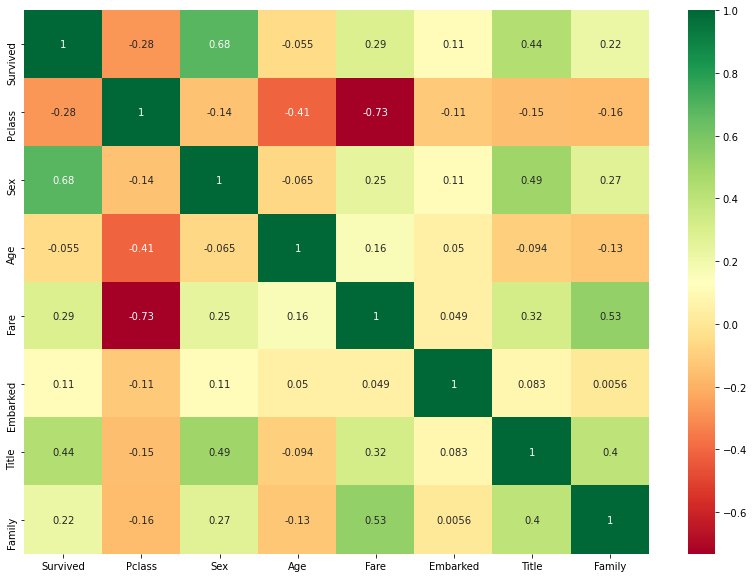

In [134]:
plt.figure(figsize=(14,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

### Modelling the data 

In [140]:
# Distributing Features and target to x and ny variable 
x=df.drop(columns=['Survived']).values
y=df['Survived'].values


In [141]:
x,y

(array([[ 3,  0, 22, ...,  0,  1,  1],
        [ 1,  1, 38, ...,  1,  3,  1],
        [ 3,  1, 26, ...,  0,  2,  0],
        ...,
        [ 3,  1, 28, ...,  0,  2,  0],
        [ 1,  1, 39, ...,  1,  5,  0],
        [ 3,  0, 38, ...,  0,  1,  0]], dtype=int64),
 array([0, 1, 1, ..., 1, 1, 0], dtype=int64))

In [142]:
from sklearn.model_selection import GridSearchCV,train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=10)

In [153]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logRegr_Model=LogisticRegression(max_iter=150)
logRegr_Model.fit(x_train,y_train)
predict_LogRegr=logRegr_Model.predict(x_test)
metrics.accuracy_score(y_test,predict_LogRegr)

0.8564593301435407

In [390]:
# Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier
Tree_model=DecisionTreeClassifier()

Tree_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [398]:
# training Accuracy 
prediction_tree=Tree_model.predict(x_train)
metrics.accuracy_score(y_train,prediction_tree)

0.9664

In [401]:
# testing Accuracy
prediction_tree=Tree_model.predict(x_test)
metrics.accuracy_score(y_test,prediction_tree)

0.7966507177033493

In [399]:
# hyper parameter optimization
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [402]:
grid=GridSearchCV(Tree_model,param_grid=param_dict,cv=10,verbose=3,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6416 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:    4.3s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=3)

In [403]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

In [404]:
Tree_model=DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

Tree_model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

In [405]:
# testing Accuracy
prediction_tree=Tree_model.predict(x_test)
metrics.accuracy_score(y_test,prediction_tree)

0.8660287081339713

### Therefore the Decission tree model is giving accuracy of 86 % 
`we can also try with Random forest and differnt models too.`